<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6 限界は破れるか（１）－  サポートベクトルマシン  －.

In [ ]:
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ラグランジュの未定乗数法の例

### 目的関数が2次関数で制約が1次式の最小化問題

* 目的関数：$f(x, y) = x^2 + y^2$
* 制約条件：$g(x, y) = x + y = 1$


まず、ラグランジュ関数 $L(x, y, λ)$ を次のように定義します。

$L(x, y, λ) = f(x, y) - λ * g(x, y) = x^2 + y^2 - λ * (x + y - 1)$

目的関数と制約条件を含んだラグランジュ関数を最小化するために、以下の方程式を解きます。

$∂L/∂x = 2x - λ = 0 $
$∂L/∂y = 2y - λ = 0 $
$∂L/∂λ = x + y - 1 = 0 $

これらを解くと、$x = y = 1/2$となるので、目的関数 $f(x, y) = x^2 + y^2$ の制約条件 $g(x, y) = x + y = 1$ の下での最小値は、$x = 1/2、y = 1/2$ のとき、$f(x, y) = (1/2)^2 + (1/2)^2 = 1/4 + 1/4 = 1/2$ です。



In [ ]:
import numpy as np
from scipy.optimize import minimize

# 目的関数
def f(x):
    return x[0]**2 + x[1]**2

# 制約式
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] - 1})

# 初期値
x0 = np.array([0.1, 0.1])

# 最適化
res = minimize(f, x0, constraints=cons)

print("最適解:", res.x)
print("最小値:", res.fun)


最適解: [0.5 0.5]
最小値: 0.4999999999999998


## 例題6.1

線形分離可能なデータに対して、線形SVMでマージン最大の識別面を求めよ。

データの準備と表示

教科書のクラス1,2をこのNotebookではそれぞれクラス0,1と読み替えます。それぞれに対応するSVM用の正解ラベルは1,-1です。

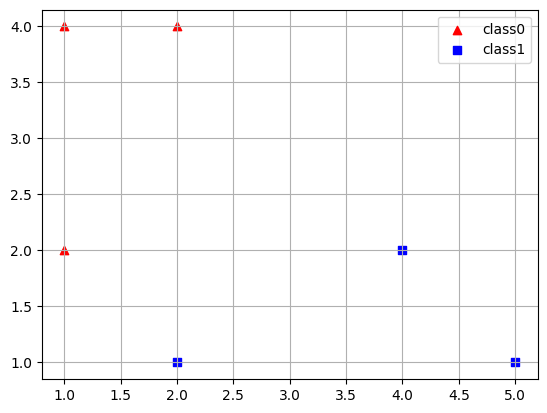

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

X = np.array([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0], [2.0, 1.0], [5.0, 1.0], [4.0, 2.0]])
y = np.array([1, 1, 1, -1, -1, -1])
plt.grid()
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='^', label='class0')
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], c='blue', marker='s', label='class1')
plt.legend(loc='upper right')

線形分離可能なデータに対するSVMの学習

In [ ]:
import numpy as np
from scipy.optimize import minimize

X = np.array([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0], [2.0, 1.0], [5.0, 1.0], [4.0, 2.0]])
y = np.array([1, 1, 1, -1, -1, -1])

# パラメータの初期値
init_params = np.zeros(X.shape[1] + 1)

# 目的関数（ここではL2ノルムを最小化する）
def objective(params):
    w = params[:-1]
    return np.sum(w**2)

# 制約条件（全てのデータポイントが正しく分類されていることを保証する）
def constraint(params):
    w = params[:-1]
    b = params[-1]
    return y * (np.dot(X, w) + b) - 1

cons = ({'type': 'ineq', 'fun': constraint})

# 最適化問題を解く
solution = minimize(objective, init_params, constraints=cons)

# 最適なパラメータを取得する
optimal_params = solution.x
w = optimal_params[:-1]
b = optimal_params[-1]

print("w = ", w)
print("b = ", b)

w =  [-1.00000001  0.99999999]
b =  1.6255811141618925e-08


scikit-learnの[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)でコーディング

課題：線形SVCでマージン最大の識別面を求めよ。

課題：学習された識別面の係数を表示し、マージン最大である$x_1 = x_2$という識別面になっていることを確認せよ。

## 例題6.2

線形分離不可能なデータに対するSVMの学習をscikit-learnのSVCでコーディングせよ．

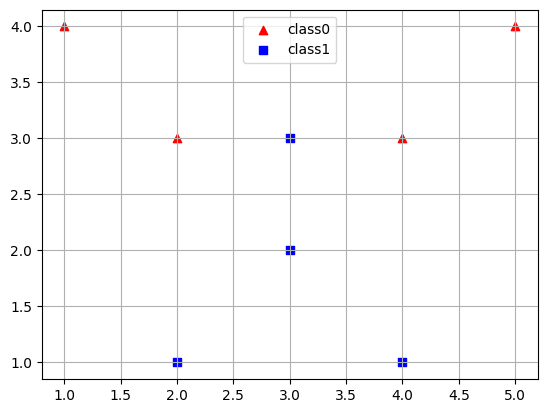

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0, 4.0], [2.0, 3.0], [4.0, 3.0], [5.0, 4.0], [2.0, 1.0], [3.0, 2.0], [3.0, 3.0], [4.0, 1.0]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])
plt.grid()
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='^', label='class0')
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], c='blue', marker='s', label='class1')
plt.legend(loc='upper center')

課題：多項式カーネルを用いて識別面を求めよ。カーネルの次数は適切なものを選択すること。

課題：RBFカーネルを用いて識別面を求めよ。gammaの値は[マニュアル](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)を読んだ上で適切なものを選択すること。

# 解答例

例題6.1

In [ ]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

clf = SVC(kernel='linear')
clf.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

In [ ]:
print(clf.coef_)
print(clf.intercept_)

例題6.2

In [ ]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

clf = SVC(kernel='poly', degree=4)
clf.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

In [ ]:
clf = SVC(kernel='rbf', gamma=0.5)
clf.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 参考

2次計画法ソルバー [cvxopt](https://cvxopt.org/) を使ったコード

* cvxopt の最適化ソルバー [solver.qp](https://cvxopt.org/userguide/coneprog.html#cvxopt.solvers.qp)では、最小化する目的関数と制約条件を行列形式で表現します。
* Pは目的関数の行列形式、qは線形項、Gとhは制約条件の不等式の行列形式、Aとbは制約条件の等式の行列形式を表しています。
  $$
  \begin{align*}
  minimize &~~~&  (1/2) \mathbf{\alpha}^T P  \mathbf{\alpha} + q^T  \mathbf{\alpha}\\
  subject~ to & & G \mathbf{\alpha} \leq h \\
  & & A \mathbf{\alpha}=b
  \end{align*}
  $$
* サポートベクターのインデックスを取得するために、閾値 1e-5 を使用しています。

In [1]:
import numpy as np
from cvxopt import matrix, solvers

X = np.array([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0], [2.0, 1.0], [5.0, 1.0], [4.0, 2.0]])
y = np.array([1, 1, 1, -1, -1, -1])

# 最適化問題の定義
P = matrix(np.outer(y, y) * np.dot(X, X.T))
q = matrix(-np.ones(len(X)))
G = matrix(-np.eye(len(X)))
h = matrix(np.zeros(len(X)))

# 最適化問題の解法
sol = solvers.qp(P, q, G, h)

# 解の取得
alpha = np.array(sol['x'])
w = np.sum(alpha * y[:, None] * X, axis=0)

# サポートベクターのインデックスの取得
sv_indices = np.where(alpha > 1e-5)[0]

# 切片の計算
b = np.mean(y[sv_indices] - np.dot(X[sv_indices], w))

# 結果の表示
print('識別面のパラメータ (w):', w)
print('識別面の切片 (b):', b)

     pcost       dcost       gap    pres   dres
 0: -1.2753e+00 -2.4920e+00  1e+01  3e+00  2e+00
 1: -1.4848e+00 -1.7842e+00  2e+00  5e-01  3e-01
 2: -9.2315e-01 -1.1119e+00  2e-01  2e-16  2e-15
 3: -9.9844e-01 -1.0012e+00  3e-03  1e-16  8e-16
 4: -9.9998e-01 -1.0000e+00  3e-05  2e-16  9e-16
 5: -1.0000e+00 -1.0000e+00  3e-07  2e-16  7e-16
Optimal solution found.
識別面のパラメータ (w): [-1.00000007  1.00000006]
識別面の切片 (b): 1.30444132162566e-08
